<a href="https://colab.research.google.com/github/skolisetty/email-me-latest-news/blob/master/Hands_on_with_Generative_AI_Demo_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On with Generative AI

This notebook demostrates how to generate text and images from input prompts. We show how to perform both tasks by calling APIs and with open models that we run locally in this notebook.

Before getting into the examples we will install some packages that we will need.

In [ ]:
# Install packages that we will use
!pip install openai
!pip install accelerate
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (

---

## Use large language models to generate text

In [ ]:
# Import packages that you will use for accessing the OpenAI API
import json
from google.colab import drive
from openai import OpenAI

You will need an API key to access the [OpenAI API](https://openai.com/index/openai-api). Here we load our API key from a file on Google drive. We do this to avoid hardcoding our personal API key in this notebook, which would make it visible to anyone who uses the notebook.

Our API key is in a file containing a JSON object of the form
```
{
  "api_key": "<MY_API_KEY>"
}
```

In [ ]:
# Mount Google Drive.
# We will get our OpenAI API key from a file that we stored in Google Drive.
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Read in API key
with open("/content/gdrive/MyDrive/OpenAI/keys.json", "r") as f:
  api_key = json.loads(f.read())["api_key"]

We will use the OpenAI API to generate a response from an input prompt. To call the API, we will create an OpenAI client object. We can later use this same client object to generate images using the DALL-E model.

In [ ]:
# Create an OpenAI client
client = OpenAI(api_key=api_key)

We can now generate text from a given prompt using a single API call. Here we pass the prompt "do snakes have ears?", then use GPT-3.5 to generate a response.

In [ ]:
# Generating responsefrom gpt-3.5-turbo

prompt = "Create the script for a movie involving a samurai corgi running loose in a cyberpunk brazilian city. "

openai_response = client.chat.completions.create(
    model = 'gpt-3.5-turbo',
    messages = [{'role': 'user', 'content': prompt}]
)

# Print the response
openai_response.choices[0].message.content

"Title: CyberCorgi Samurai\n\nFade in:\n\nExt. Cyberpunk Brazilian City - Day\n\nThe bustling streets of a futuristic Brazilian city are filled with neon lights and towering skyscrapers. Among the chaos, a small but mighty figure darts through the crowd - a Samurai Corgi named Hiro.\n\nInt. Hiro's Owner's Apartment - Day\n\nHiro's owner, Maria, frantically searches her apartment for her beloved pet. She calls out his name, but Hiro is nowhere to be found.\n\nMaria: (worried) Hiro, where are you boy?\n\nExt. Cyberpunk Brazilian City - Day\n\nHiro navigates the crowded streets with ease, his tiny paws moving swiftly through the neon-lit city. He jumps over obstacles and dodges passerby, showing off his impressive samurai skills.\n\nSuddenly, Hiro catches the scent of his owner and follows it through the maze-like alleyways of the city.\n\nInt. Cyberpunk Nightclub - Night\n\nHiro bursts into a crowded nightclub, navigating through the flashing lights and thumping music. He spots Maria at 

---
Now we will download a model to this notebook and generate a response locally from this model. We will use the Hugging Face Transformers package to accomplish this. There are various open models we can use with Transformers. We will use Microsoft's Phi-3-mini model, which is a relatively small (3.8 billion parameters) but capable model.

In [ ]:
# Import the Transformers package
from transformers import AutoModelForCausalLM, AutoTokenizer

We will need a tokenizer to convert our text input into a sequence of tokens and a model to generate a response from the provided context tokens.

In [ ]:
# Load the model and tokenizer
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-4k-instruct",
                                             device_map="cuda",
                                             torch_dtype="auto",
                                             trust_remote_code=True
                                             )
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/931 [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


We will evaluate the same prompt as above ("do snakes have ears?") with the Phi-3-mini model. We will first convert our prompt to tokens, generate the output tokens, then convert back to text to view the output.

In [ ]:
# Tokenize the input context
prompt = "What's the most venomous snake in Australia?"
context = """<s><|user|> What\'s the most venomous snake in Australia?<|end|><|assistant|> The most venomous snake in Australia is the Inland Taipan (Oxyuranus microlepidotus), also known as the "fierce snake." However, it\'s important to note that while the Inland Taipan has the most toxic venom of any snake, it is not commonly found near human habitation. The snakes most often encountered by Australians are the Eastern Brown Snake (Pseudonaja textilis) and the Coastal Taipan (Oxyuranus scutellatus), which are also highly venomous and pose significant risk."""


messages = [{"role": "user", "content": f"{context} <|end|> Where does it live?" }]
inputs = tokenizer.apply_chat_template(messages, add_generation_prompt=True, return_tensors="pt")

# Pass the context to the model and generate an output
outputs = model.generate(inputs.to("cuda"), max_new_tokens=128)
text = tokenizer.batch_decode(outputs)[0]
text

'<s><|user|><s><|user|> What\'s the most venomous snake in Australia?<|end|><|assistant|> The most venomous snake in Australia is the Inland Taipan (Oxyuranus microlepidotus), also known as the "fierce snake." However, it\'s important to note that while the Inland Taipan has the most toxic venom of any snake, it is not commonly found near human habitation. The snakes most often encountered by Australians are the Eastern Brown Snake (Pseudonaja textilis) and the Coastal Taipan (Oxyuranus scutellatus), which are also highly venomous and pose significant risk. <|end|> Where does it live?<|end|><|assistant|> The Inland Taipan primarily inhabits the central-western regions of Australia, particularly in the semi-arid areas of the Outback. Its range extends from the Pilbara and Gascoyne regions in Western Australia, through the Nullarbor Plain, and into the border areas of South Australia and the Northern Territory. The Inland Taipan prefers open habitats such as grasslands, scrublands, and r

---

## Use diffusion models to generate images

We can now generate an image from given prompt using a single API call. We will use the same OpenAI API client that we opened before to call OpenAI's DALL-E model. Here we pass the prompt "a realistic photograph of a snake with ears", then use DALL-E 3 to generate an image.

In [ ]:
# Use the OpenAI API to generate an Image from DALL-E
response = client.images.generate(
  model="dall-e-3",
  prompt="a realistic photograph of a snake with ears",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

The DALL-E API generates an image, then provides a URL that can be used to access the image. We pull the image data from this URL below, then display in the notebook.

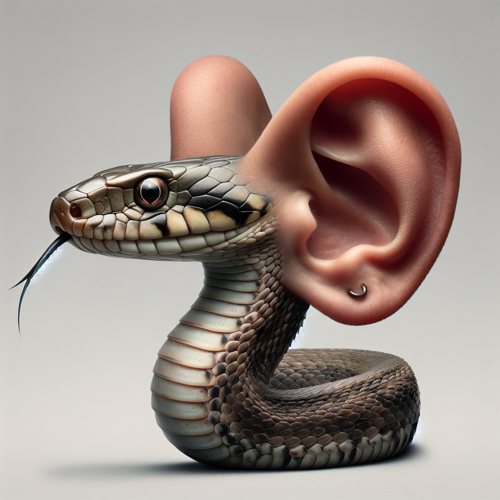

In [ ]:
# Import packages for displaying the generated image
import urllib.request
from io import BytesIO
from PIL import Image

# Load and display the image
with urllib.request.urlopen(image_url) as url:
    img = Image.open(BytesIO(url.read()))
display(img.resize((500, 500)))



##### Let's set this up as a function so we can reuse it later


In [ ]:
# Let's first encapsulate the logic of taking
# the openAI API results and displaying images
def display_image(url):
    with urllib.request.urlopen(url) as url:
        img = Image.open(BytesIO(url.read()))
    display(img.resize((500, 500)))

# And then let's put the logic of calling dallE
# and visualizing the images into this function
# to simplify the next exercises.
def call_dalle_basic_prompt(prompt):
  response = client.images.generate(
    model="dall-e-3",
    prompt=prompt,
    size="1024x1024",
    quality="standard",
    n=1,
  )
  image_url = response.data[0].url
  display_image(image_url)


# How can we improve results?

Try to visualize the image you want to generate in your mind's eye. What is the subject? Where are they? What are the vibes you want to convey?

The image generated from the diffusion model is a function of what you give it to work with. Here are some interesting examples.

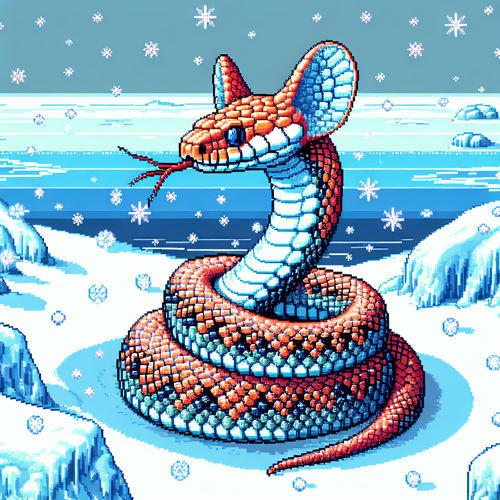

In [ ]:
subject_prompt = "snake with ears"

# Maybe we are a huge fan of old school games. What about some Pixel art?
pixel_prompt_modifier = "Pixel art image"

# Let's talk more about where the snake is located. Maybe, it's in a cold habitat, like the arctic?
environment_modifier = "in the arctic tundra, heavy snow"

# And then add some more specifics
action_modifier = "proudly hissing"
appearance_modifier = "false coral snake, shining scales"


# And then we can put it all together
PIXEL_PROMPT = f"{pixel_prompt_modifier} of a {subject_prompt}, {appearance_modifier}, {action_modifier}, {environment_modifier}"

call_dalle_basic_prompt(PIXEL_PROMPT)


In [ ]:
# We can now make this into a function that we can reuse, and then try new things.
def create_simple_enhanced_prompt(query):
  built_prompt = f"{query['style']} of a {query['subject']}, {query['appearance']}, {query['action']}, {query['environment']}"
  return built_prompt






In [ ]:
# @title Let's craft different images!
subject = "snake with ears" # @param {type:"string"}
action = "sleeping" # @param {type:"string"}
environment = "in the sahara desert" # @param {type:"string"}
appearance = "a brazilian anaconda, muted scales" # @param {type:"string"}
style = "A high end luxury photoshoot" # @param {type:"string"}

# Let's then try iterating through different prompts, and try to change our image.
query = {
    "subject": subject,
    "action": action,
    "environment": environment,
    "appearance": appearance,
    "style": style
}

create_simple_enhanced_prompt(query)
call_dalle_basic_prompt(prompt)

---

Now we will download a model to this notebook and generate an image locally from this model. We will use the Hugging Face Diffusers package to accomplish this. There are various open models we can use with Diffusers. We will use Stability AI's Stable Diffusion XL model for this.

The free Colab T4 instance might run out of GPU memory if we run the code below after running the language model. You can restart the runtime before running the code below to free up the GPU memory.

In [ ]:
# Check on GPU memory usage
!nvidia-smi

Fri Jun 21 01:08:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0              29W /  70W |   7791MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Import the Diffusers package
from diffusers import DiffusionPipeline
import torch

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


Below we load the Stable Diffusion XL model into a pipeline that combines all of the components used to generate an image (e.g., a text encoder, a text-conditioned U-Net, a scheduler, and a variational autoencoder).

In [ ]:
# Load the Stable Diffusion XL model
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
pipe.to("cuda")

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.29.1",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Now that our model pipeline is loaded, we will pass the same prompt that we provided to DALL-E above ("a realistic photograph of a snake with ears") to Stable DIffusion XL.

In [ ]:
# Generate an image from a prompt
prompt = "a realistic photograph of a snake with ears"
image = pipe(prompt=prompt, width=512, height=512).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 256.00 MiB. GPU 